# Produce WC Map of Toronto, while excluding some countries

In [11]:
import matplotlib as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from __future__ import (absolute_import, division, print_function)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

%matplotlib inline

In [12]:
# read csv file and work with this new file
eth_by_tract2 = pd.read_csv('EthByTract.csv')
eth_by_tract2 = eth_by_tract2.set_index('ALT_GEO_CODE')
eth_by_tract2 = eth_by_tract2.drop('Total - Ethnic origin for the population in private households - 25% sample data',1)

# Drop any unwanted countries here (potentially will need to update color dictionary below)

In [13]:
eth_by_tract2 = eth_by_tract2.drop('English',1)

In [14]:
# Print out dataframe
eth_by_tract2

,French,Belgian,German,Swiss,Danish,Icelandic,Swedish,Polish,Russian,Croatian,...,Nigerian,Senegalese,Egyptian,Moroccan,Tunisian,Iranian,Saudi Arabian,Japanese,Korean,Australian
ALT_GEO_CODE,,,,,,,,,,,,,,,,,,,,,
535000100,0.086957,0.000000,0.078261,0.017391,0.017391,0.017391,0.017391,0.043478,0.017391,0.026087,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
535000200,0.046154,0.038462,0.192308,0.015385,0.015385,0.000000,0.000000,0.084615,0.076923,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
535000300,0.087912,0.000000,0.120879,0.021978,0.000000,0.000000,0.000000,0.043956,0.000000,0.043956,...,0.000000,0.032967,0.021978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
535000400,0.067717,0.001575,0.062205,0.004724,0.007087,0.001575,0.005512,0.060630,0.011811,0.007874,...,0.001575,0.000000,0.001575,0.001575,0.001575,0.006299,0.000000,0.002362,0.004724,0.003150
535000500,0.081081,0.000000,0.081081,0.003276,0.004914,0.001638,0.009009,0.065520,0.015561,0.009828,...,0.000000,0.000000,0.004914,0.000000,0.000000,0.004914,0.000000,0.004914,0.007371,0.003276
535000701,0.082278,0.004747,0.068038,0.003165,0.003165,0.000000,0.007911,0.044304,0.025316,0.003165,...,0.000000,0.000000,0.004747,0.000000,0.000000,0.000000,0.000000,0.009494,0.004747,0.003165
535000702,0.069717,0.005447,0.061002,0.002179,0.000000,0.000000,0.004357,0.054466,0.020697,0.005447,...,0.002179,0.000000,0.003268,0.002179,0.000000,0.005447,0.000000,0.006536,0.004357,0.002179
535000801,0.093648,0.004584,0.095612,0.004584,0.003274,0.002620,0.009168,0.058284,0.029470,0.007859,...,0.004584,0.000000,0.006549,0.001310,0.000000,0.011133,0.000000,0.009168,0.020301,0.003929
535000802,0.068285,0.004047,0.091047,0.003035,0.007081,0.001517,0.004552,0.045018,0.033890,0.004552,...,0.005564,0.000000,0.011128,0.005058,0.000000,0.022256,0.000000,0.006576,0.011128,0.005058


In [15]:
# Iterates through dataframe to find max ethnicity per tract
temp_lst = []

for tract in eth_by_tract2.index:
    max_ethnicity = eth_by_tract2.loc[tract].idxmax()
    temp_lst.append([tract,max_ethnicity])
    
max_ethnicity_df = pd.DataFrame(np.array(temp_lst))
max_ethnicity_df = max_ethnicity_df.rename(columns={0:'ALT_GEO_CODE',1:'MaxEthnicity'})


# Alter ALT_GEO_CODE column to conform with census code names in the shapefile
max_ethnicity_df['ALT_GEO_CODE'] = (max_ethnicity_df['ALT_GEO_CODE'].astype(str).str[0:7] + '.' + max_ethnicity_df['ALT_GEO_CODE'].astype(str).str[7:9])
max_ethnicity_df = max_ethnicity_df.set_index('ALT_GEO_CODE')
max_ethnicity_df['MaxEthnicity'].value_counts()

# Observe value counts to see if any new countries are present (will have to update colour dictionary in this case)

German        306
Portuguese    247
French        217
Polish        147
Iranian        73
Spanish        57
Russian        40
Korean         25
Nigerian       15
Egyptian       14
Serbian         2
Danish          1
Japanese        1
Colombian       1
Name: MaxEthnicity, dtype: int64

In [16]:
# Due to techncial limitations had to use 2011 shapefile and 2016 census data, for any 2011 census tracts
# that were divided in 2016, I took one of the divisions and used its max ethnicity for the entire 2011 tract
# Rename rows to match old census tracts
# Key, row to be renamed, name to give row
lst_of_renames = {'5350008.01':'5350008.00',
                 '5350012.03':'5350012.02',
                 '5350013.01':'5350013.00',
                 '5350028.01':'5350028.00',
                 '5350047.03':'5350047.01',
                 '5350050.03':'5350050.02',
                 '5350063.04':'5350063.01',
                 '5350063.03':'5350063.02',
                 '5350065.01':'5350065.00',
                 '5350096.01':'5350096.00',
                 '5350097.03':'5350097.02',
                 '5350012.04':'5350102.01',
                 '5350128.05':'5350128.03',
                 '5350139.01':'5350139.00',
                 '5350183.01':'5350183.00',
                 '5350195.01':'5350195.00',
                 '5350196.01':'5350196.00',
                 '5350200.01':'5350200.00',
                 '5350204.00':'5350205.00', 
                 '5350210.01':'5350210.00',
                 '5350213.02':'5350213.00',
                 '5350223.01':'5350223.00',
                 '5350260.06':'5350260.03',
                 '5350287.03':'5350287.01',
                 '5350290.01':'5350290.00',
                 '5350291.03':'5350291.01',
                 '5350308.03':'5350308.01',
                 '5350337.01':'5350337.00',
                 '5350355.05':'5350355.03',
                 '5350411.09':'5350411.20',
                 '5350412.22':'5350412.23',
                 '5350412.24':'5350413.00'}

In [17]:
# Appends a list of old census tracts and interpolates the max ethnicity value based
# on what it is for the new census tracts

for key,value in lst_of_renames.items():
    temp_df = pd.DataFrame([[value,max_ethnicity_df.loc[key]['MaxEthnicity']]],columns=['ALT_GEO_CODE','MaxEthnicity'])
    temp_df = temp_df.set_index('ALT_GEO_CODE')
    
    max_ethnicity_df = max_ethnicity_df.append(temp_df)

max_ethnicity_df

,MaxEthnicity
ALT_GEO_CODE,
5350001.00,French
5350002.00,German
5350003.00,German
5350004.00,French
5350005.00,French
5350007.01,French
5350007.02,French
5350008.01,German
5350008.02,German


# Mapping

In [18]:
# Hardcoded Dictionary Colours
ethnicity_colours = {'English':'#6f8cd2','Portuguese':'#ff0000','Iranian':'#009900','Polish':'#999999','Russian':'#33ccff',
                    'Spanish':'#ff6600','Korean':'#ff33cc','Egyptian':'#e6e600','Nigerian':'#99ff66','French':'#00ffcc',
                    'German':'#000000','Colombian':'#660033','Serbian':'#cc6600','Danish':'#ffffff','Japanese':'#ff9999'}



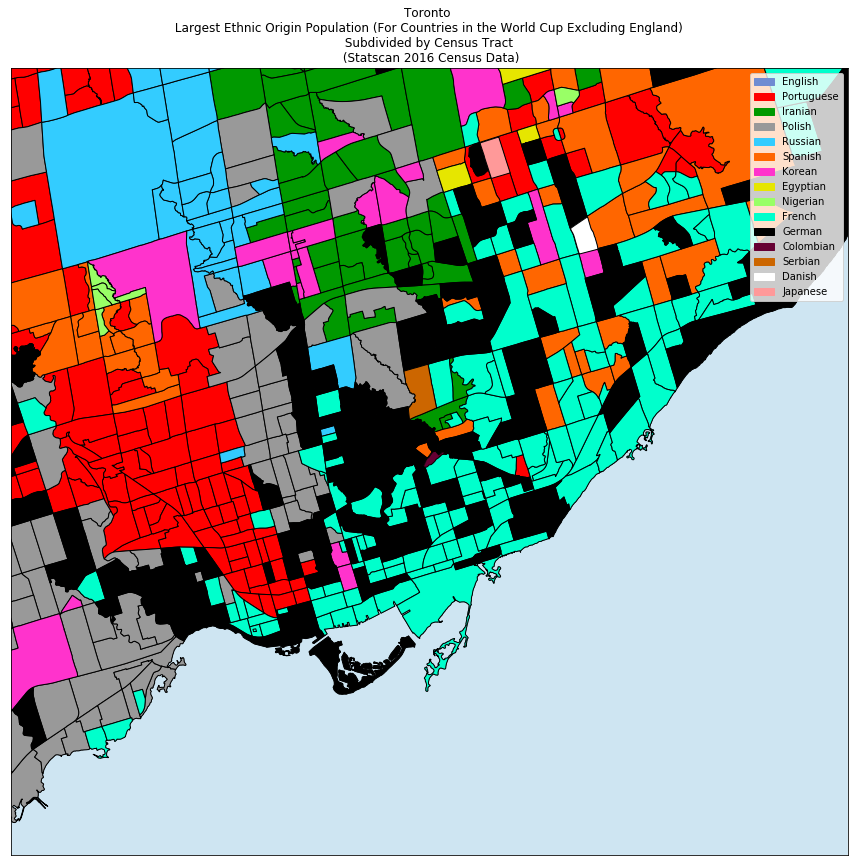

In [21]:
fig     = plt.figure(figsize=(15,15))
ax      = fig.add_subplot(111)

map = Basemap(llcrnrlon=-79.56,llcrnrlat=43.55,urcrnrlon=-79.124,urcrnrlat=43.85,
             resolution='i', projection='tmerc', lat_0 = 43.70, lon_0 = -79)
map.fillcontinents(color='#cee5f2',lake_color='#cee5f2')
map.readshapefile('gct_000b11a_e', 'statcan')

# Creates a dictionary in which to store patches to be displayed on the map
patches_dict = {}
for ethnicity in ethnicity_colours:
    patches_dict[ethnicity]=[]
    
# Iterate through shapefile, for each shape in Toronto add a patch to the
# list corresponding to max ethnicity in census tract
for info, shape in zip(map.statcan_info, map.statcan):
    if info['CTUID'] in max_ethnicity_df.index:
        patches_dict[max_ethnicity_df.loc[info['CTUID']]['MaxEthnicity']].append(Polygon(np.array(shape), True))

# Draw collection of patches representing different countries to the map
for ethnicity,ethnicity_patches in patches_dict.items():
    ax.add_collection(PatchCollection(ethnicity_patches,facecolor= ethnicity_colours[ethnicity], edgecolor='black' ,linewidths=1., zorder=2))

# Draws legend on map
lgd = []
for ethnicity in patches_dict:
    lgd.append(mpatches.Patch(color=ethnicity_colours[ethnicity], label=ethnicity))

plt.legend(handles=lgd)
plt.title('Toronto \n Largest Ethnic Origin Population (For Countries in the World Cup Excluding England) \n Subdivided by Census Tract \n (Statscan 2016 Census Data)')

plt.show()

# Output as PNG

In [22]:
fig.savefig('WCMapExCountries.png',bbox_inches='tight',dpi=500)